In [5]:
import random
from gmpy import *
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from math import floor, sqrt
from matplotlib.legend_handler import HandlerLine2D

# <h2>Exercice 1 :Arithmétique dans Zn<h2>

<strong>1.a] Fonction my_gcd qui prend des entiers a, b et retourne pgcd(a, b)</strong>

In [81]:
def my_gcd(a, b):
   
    if b > a:
        a, b = b, a
    remainder = b
    while remainder != 0:
        remainder = a % b
        a = b
        b = remainder
    return a

<strong>1.b] Fonction my_inverse qui prend des entiers a, N et retourne b inverse de a modulo N</strong>

In [82]:
def my_inverse(a, N):
    if a < N:
        u0 = 0
        u1 = 1
        b = a
        a = N
    else:
        u0 = 1
        u1 = 0
        b = N
    # after initializing properly a and b we apply extended Euclid algorithm on (a, b) and return u0 such that
    # a*u0 is cogurent to 1 modulo b
    remainder = b
    while remainder != 0:
        q = a // b
        remainder = a - q * b
        a = b
        b = remainder
        u2 = u0 - q * u1
        u0 = u1
        u1 = u2
    if a != 1:
        return "error"
    return u0

In [55]:
def complexity_test():
    timing_gcd = []
    timing_inverse = []
    for i in range(2000):
        # we discretize the interval to assure that we sample from all the ranges of bits
        if i <= 500:
            b1 = random.randint(4, 16)
            b2 = random.randint(b1, 16) #  assure that N > a
        elif (i > 500) and (i <= 1000):
            b1 = random.randint(16, 32)
            b2 = random.randint(b1, 32)
        elif (i > 1000) and (i <= 1500):
            b1 = random.randint(32, 64)
            b2 = random.randint(b1, 64)
        else:
            b1 = random.randint(64, 128)
            b2 = random.randint(b1, 128)
        t_gcd_elapsed = 0
        t_inverse_elapsed = 0
        if i % 100 == 0:
            print(i)
        for j in range(3000):
            a = 0
            N = 0
            while a == 0:
                a = random.getrandbits(b1)

            while N == 0 or N == a:  # avoid these cases as the running time will be instantaneous
                N = random.getrandbits(b2)
            t_gcd = time.time()
            g = my_gcd(a, N)
            t_gcd_elapsed += time.time() - t_gcd

            t_inverse = time.time()
            g2 = my_inverse(a, N)
            t_inverse_elapsed += time.time() - t_inverse

        timing_gcd.append([(b1 * b2) / 32, t_gcd_elapsed / 3000])
        timing_inverse.append([(b1 * b2) / 32, t_inverse_elapsed / 3000])

    T = np.array(sorted([t for t in timing_gcd if t[1] > 0])) # as we sample randomly, so b1 and b2 may not be in order
    T2 = np.array(sorted([t for t in timing_inverse if t[1] > 0]))
    plt.figure()
    line2, = plt.plot(T[:, 0], T[:, 1], 'b', label='my_gcd(a, b)')
    line1, = plt.plot(T2[:, 0], T2[:, 1], 'r', label='my_inverse(a, N)')
    plt.title('Temps de calcul en fonction de taille binaire d'' entrée')
    plt.ylabel('Temps (secondes)')
    plt.xlabel('taille(a) * taille(b)')
    plt.legend(handler_map={line2: HandlerLine2D()})

    plt.show()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


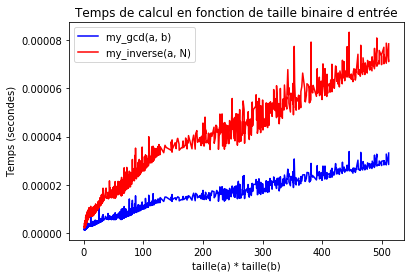

In [20]:
complexity_test()

In [43]:
def my_expo_mod(x, y, n):
    """puissance modulaire: (x**y)%n avec x, y et n entiers"""
    result = 1
    while y>0:
        if y&1>0:
            result = (result*x)%n
        y >>= 1
        x = (x*x)%n
    return result

<h2> Exercice 2 :Test naı̈f et recherche des nombres de Carmichael</h2>

<strong> 2.a] effectue le test naif de primalité sur un entier n.</strong>

In [83]:
def first_test(n):
    for k in range(2, int(floor(sqrt(n)) + 1)):
        if n % k == 0:
            return "composite"
    return "prime"

<strong>2.b] Donner la complexité de votre algorithme.</strong>

<strong>2.c] Compte les nombres premiers inférieurs à 10^5 </strong>

In [36]:
def count_prime_10e5():
    cpt=0
    i=2
    while i<10**5:
        if first_test(i)=="prime":
            cpt+=1
        i+=1
    return cpt
    


<strong>2.d] Carmichael qui sont inférieurs à 10^5 </strong>

In [66]:
def is_carmichael(n):
    if first_test(n) == "composite":
        a = 2
        ok = 1
        while a != n and ok == 1:
            if my_gcd(n, a) == 1:
                if my_expo_mod(a, n, n) != a:
                    ok = 0
            a += 1
        if a == n and ok == 1:
            return True
    return False

def gen_carmichael(n):
    l = []
    res = []
    for i in range(2,n):
        if is_carmichael(i):
            l.append(i)
    return l

<strong>2.e] Carmichael de longueur binaire k avec 3 facteurs premiers </strong>

In [50]:
def interval(n):
    mini=[]
    maxi=[]
    for i in range(0,n):
        mini.append(str(0))
        maxi.append(str(1))
    mini[0] =1  
    deb=bin(int(''.join(map(str, mini)), 2) << 0)
    fin=bin(int(''.join(map(str, maxi)), 2) << 0)
    deb=int(deb,2)
    fin=int(fin,2)
    return [deb,fin]

def carmichael_list(debut,fin, primes):
    list_carmichael = []
    possible_n = list(set(list(range(debut, fin, 1))) - set(primes))
    list_carmichael = []
    for n in possible_n:
        if is_carmichael(n):
            list_carmichael.append(n)
    return list_carmichael

In [56]:
def gen_carmichael_3(length):
    debut,fin=interval(length)
    list_carmichael_3_factors =[]
    count_primes = 0
    primes = []
    for i in range(2, fin):
        if first_test(i) == "prime":
            count_primes += 1
            primes.append(i)
    list_carmichael = carmichael_list(debut,fin, primes)
    
    for carmichael_number in list_carmichael:
        counter = 0
        temp_number = carmichael_number
        for p in primes:
            if temp_number % p == 0:
                temp_number = temp_number//p
                counter += 1
            if p > temp_number or counter == 3:
                break
        if counter == 3 and temp_number == 1:
            list_carmichael_3_factors.append(carmichael_number)
    return random.choice(list_carmichael_3_factors)

<strong>2.f] Plus grand Carmichael trouvé qvec la fonction gen_carmichael </strong>

In [67]:
gen_carmichael(10**6)[-1]

997633

<h2> Exercice 3 :Test de Fermat</h2>

<strong>3.a] Test de primalité de Fermat </strong>

In [80]:
def test_fermat(N):
    a = random.randint(2,N-1)
    if ((my_expo_mod(a,N-1,N) != 1)):
        return N,'COMPOSITE'
    return N,"PROBABLY PRIME"

<strong>3.b] Test de la fonction test_fermat </strong>

In [85]:
def tester_fermat_test():
    c_list = gen_carmichael(100000)
    r_list = [random.randrange(2, 1.e8) for i in range(1000)]
    com_list = [n for n in r_list if first_test(n) == 'composite']
    for c in c_list:
        print(test_fermat(c))
    for r in r_list:
        print(test_fermat(r))
    for com in com_list:
        print(test_fermat(com))

<strong>3.c] Estimation de la probabilité d’erreur de test_fermat </strong>

In [84]:
def fermat_test_success_probabilite(max_number):
    list_proba = []
    for k in range(2, 21):
        total_count = 0
        failure_count = 0
        for n in range(5, max_number):
            number, test = test_fermat(n)
            if test == "PROBABLY PRIME":
                total_count += 1
                if first_test(number) == 'composite':
                    failure_count += 1
        list_proba.append(failure_count / total_count)

    plt.plot(range(2, 21), list_proba)
    plt.show()

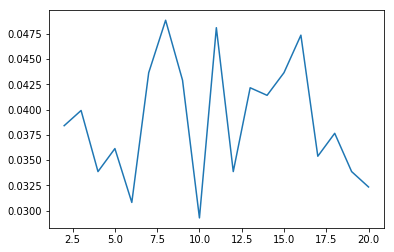

In [87]:
fermat_test_success_probabilite(10000)

<h2> Exercice 4 :Test de Rabin et Miller</h2>

<strong>4.a] Test de primalité de Miller-Rabin </strong>

In [115]:
def test_miller_rabin(N, T=5000):
    if (N%2) == 0:
        return N,'COMPOSITE'
    m = N-1
    h = 0
    while (m%2) == 0:
        m//=2
        h+=1
    
    for i in range(T):
        a = random.randint(2,N-1)
        b = my_expo_mod(a,m,N)
        
        if b != 1 and b != (N-1):
            
            for j in range(h-1):
                if b != (N-1) and my_expo_mod(b,2,N) == 1:
                    return N,'COMPOSITE'
                b = my_expo_mod(b,2,N)
            
            if b != (N-1):
                return N,'COMPOSITE'
    return N,'PRIME'

<strong>4.b] Test de la fonction du test_miller_rabin </strong>

In [108]:
def tester_millier_test():
    c_list = gen_carmichael(100000)
    r_list = [random.randrange(2, 1.e8) for i in range(1000)]
    com_list = [n for n in r_list if first_test(n) == 'composite']
    for c in c_list:
        print(miller_rabin_test(c, 1))
    # for r in r_list:
    #     print(miller_rabin_test(c, 1))
    # for com in com_list:
    #     print(miller_rabin_test(c, 1))

<strong>4.c] Estimation de la probabilité d’erreur de test_miller_rabin </strong>

In [113]:
def miller_rabin_test_success_probabilite(max_number):
    list_proba = []
    for k in range(2, 21):
        total_count = 0
        failure_count = 0
        for n in range(5, max_number):
            number, test = test_miller_rabin(n)
            if test == "PRIME":
                total_count += 1
                if first_test(number) == 'composite':
                    failure_count += 1
        list_proba.append(failure_count / total_count)

    plt.plot(range(2, 21), list_proba)
    plt.show()
    

<strong>4.d] Fonction gen_rsa </strong>

In [117]:
def gen_rsa(t):
    if t<3:
        print('Entrer une valeur plus grande')
        return 0 
    l=[]
    inf = int(pow(2,t-1))
    sup = int(pow(2,t))
    p=0
    q=0
    while(1):
        i = random.randint(inf,sup)
        if (test_miller_rabin(i)):
            p = i
            l.append(p)
            break
            
    while(1):
        j = random.randint(inf,sup)
        if (test_miller_rabin(j)):
            if j != p:
                q = j
                l.append(q)
                break
    return p*q